## **Loading the dataset**



In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Curstomer Chrun.csv")

In [2]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


## Task 1: Data Understanding and Exploratory Data Analysis (EDA)

**Columns**

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Shape**

In [4]:
df.shape

(360, 21)

**Description of dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        360 non-null    object 
 1   gender            360 non-null    object 
 2   SeniorCitizen     360 non-null    int64  
 3   Partner           360 non-null    object 
 4   Dependents        360 non-null    object 
 5   tenure            360 non-null    int64  
 6   PhoneService      360 non-null    object 
 7   MultipleLines     360 non-null    object 
 8   InternetService   360 non-null    object 
 9   OnlineSecurity    360 non-null    object 
 10  OnlineBackup      360 non-null    object 
 11  DeviceProtection  360 non-null    object 
 12  TechSupport       360 non-null    object 
 13  StreamingTV       360 non-null    object 
 14  StreamingMovies   360 non-null    object 
 15  Contract          360 non-null    object 
 16  PaperlessBilling  360 non-null    object 
 1

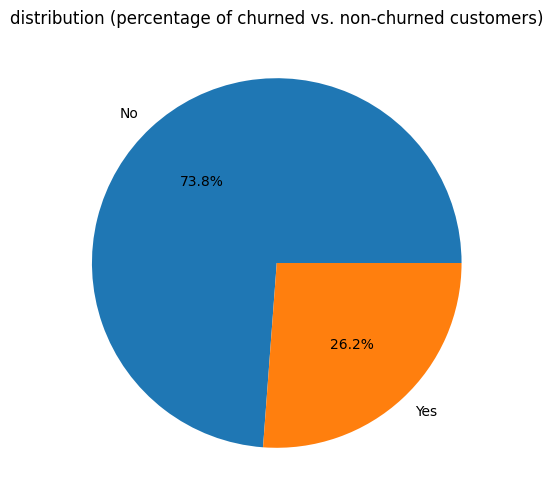

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%')
plt.title('distribution (percentage of churned vs. non-churned customers)')
plt.show()

# Understand the Dataset:**bold text**

- This dataset contains 360 rows and 21 columns. It refers to customer data including personal, service-oriented, and billing information. Here is a data description:

- Number of rows: 360
- Number of columns: 21
- Column Information:

| Columns | Datatype |
| --- | --- |
 customerID           |  object
 gender               |  object
 SeniorCitizen        |  int64  
 Partner              |  object
 Dependents           |  object
 tenure               |  int64  
 PhoneService         |  object
 MultipleLines        |  object
 InternetService      |  object
 OnlineSecurity       |  object
 OnlineBackup         |  object
 DeviceProtection     |  object
 TechSupport          |  object
 StreamingTV          |  object
 StreamingMovies      |  object
 Contract             |  object
 PaperlessBilling     |  object
 PaymentMethod        |  object
 MonthlyCharges       |  float64
 TotalCharges         |  float64
 Churn                |  object

- Churn (object): Target Column , Whether the customer churned (Yes/No). There is 1 missing value in this column.
- Percentage of Customer churned = 26.2 %
- Percentage of Customer not-churned= 73.8 %
- The dataset consists of categorical and numerical data for analysis to understand customer churn behavior.

In [7]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
df[df['Churn'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
359,9833-TGFHX,Male,0,Yes,Yes,42,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,No,Electronic check,97.1,4016.0,NaN


In [9]:
df = df.drop(359)
df = df.reset_index(drop = True)

In [10]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,359.0,0.169916,0.376084,0.00,0.000,0.00,0.000,1.0
tenure,359.0,31.448468,24.572706,1.00,8.000,27.00,53.000,72.0
MonthlyCharges,359.0,65.723259,29.225149,18.95,44.475,70.90,89.600,115.1
TotalCharges,359.0,2199.381337,2175.663878,19.25,419.075,1328.15,3548.775,8129.3


In [12]:
df.duplicated().sum()

0

In [13]:
type(df['TotalCharges'][0])

numpy.float64

# Handle Missing or Incorrect Data:
- Check for missing values and provide a strategy for handling them.
- Specifically, handle the TotalCharges column, which is currently stored as an object but should likely be a numeric feature. Address any potential issues with this column (e.g., non-numeric values).

#### Only **Churn column** has the missing value.
### **Churn column**:
- There is 1 missing value in the Churn column, at index 359.
- Method: Only one missing value exists in this column, and we will not expect it to play a significant role in the general conclusion. So we will remove the row that carries a missing Churn value.
- Action: Dropped Row 359

### **Handling With TotalCharges Column**
- TotalCharges is already of **float64** so we are done.
- If there were any non-numeric we would typically:
- Find non-numeric values (such as blanks or characters).
- Convert the column to numeric (if it was an object type) and handle errors (such as making non-numeric entries NaN).
- For non-numeric values-if there are any: Use either
Impute with the mean, median or mode, or
Drop rows containing non-numeric values if they're minimal.


In [14]:
columns=['gender', 'Partner', 'Dependents',
         'PhoneService', 'MultipleLines', 'InternetService',
         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
         'TechSupport','StreamingTV', 'StreamingMovies',
         'Contract', 'PaperlessBilling','PaymentMethod', 'Churn']

In [15]:
unique_values_dict = {col: df[col].unique().tolist() for col in columns}
count_values_dict = {col: df[col].value_counts().tolist() for col in columns}

In [16]:
unique_values_dict

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

In [17]:
count_values_dict

{'gender': [189, 170],
 'Partner': [190, 169],
 'Dependents': [248, 111],
 'PhoneService': [318, 41],
 'MultipleLines': [180, 138, 41],
 'InternetService': [159, 134, 66],
 'OnlineSecurity': [180, 113, 66],
 'OnlineBackup': [154, 139, 66],
 'DeviceProtection': [175, 118, 66],
 'TechSupport': [189, 104, 66],
 'StreamingTV': [149, 144, 66],
 'StreamingMovies': [149, 144, 66],
 'Contract': [199, 88, 72],
 'PaperlessBilling': [214, 145],
 'PaymentMethod': [125, 81, 79, 74],
 'Churn': [265, 94]}

## Label Encoding

In [18]:
from sklearn import preprocessing
for i in columns:
  label_encoder = preprocessing.LabelEncoder()
  df[i]= label_encoder.fit_transform(df[i])
  print(type(df[i][0]))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [19]:
import seaborn as sns

# Generate Insights:
- Perform univariate and bivariate analysis on the dataset. Use visualizations (e.g., histograms, bar plots, box plots) to
explore relationships between features and the target variable (Churn).
- Some key areas to investigate:
- How does customer tenure relate to churn?
- Is there a correlation between monthly charges and churn?
- Which service types (Internet, Phone, Streaming) have higher churn rates?

## **Distribution of tenure**

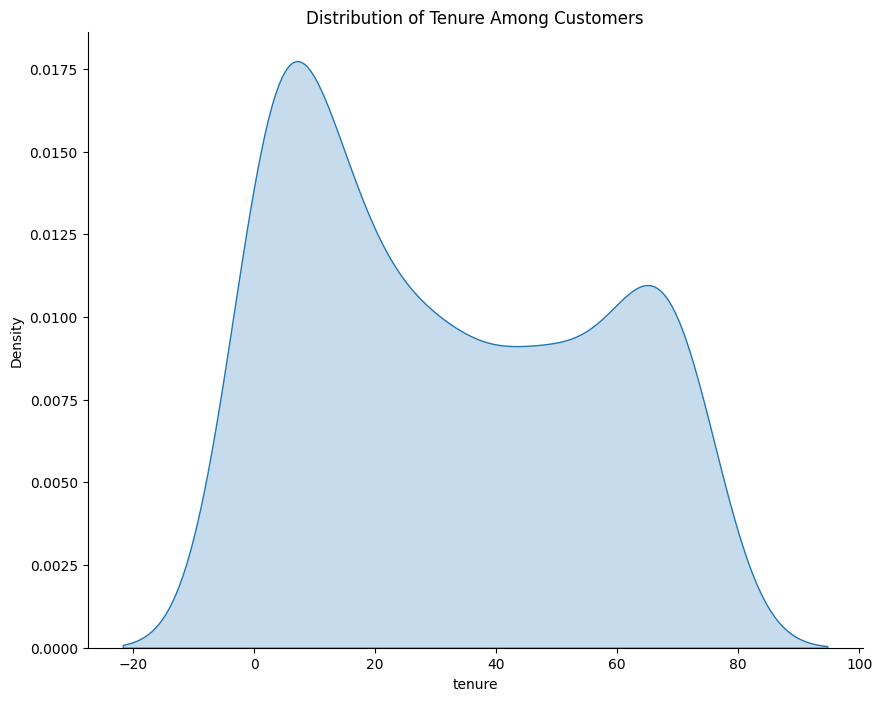

In [20]:
plt.figure(figsize=(10,8))
sns.kdeplot(data = df , x = df['tenure'] , fill = True , common_norm=True)
plt.title('Distribution of Tenure Among Customers')
sns.despine()
plt.show()

## **Tenure Vs Churn**

<ipython-input-21-119557f4d9eb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='Set3')


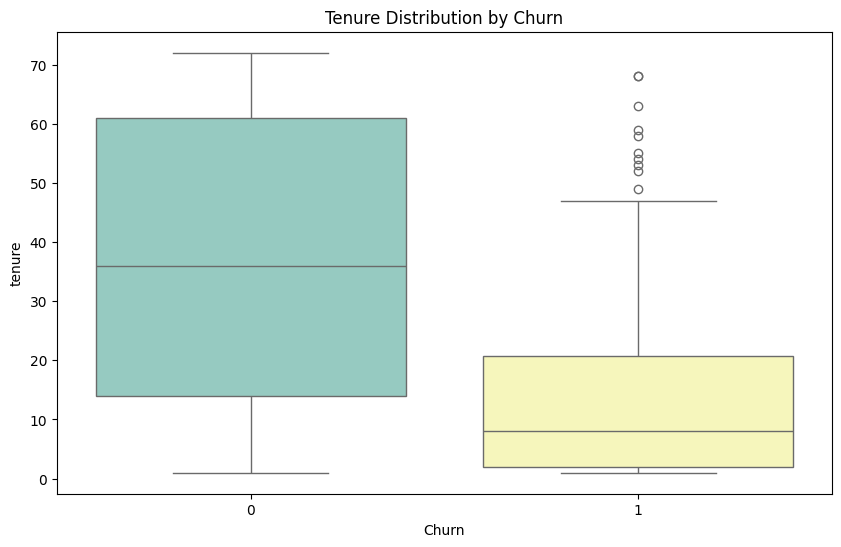

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set3')
plt.xlabel('Churn')
plt.ylabel('tenure')
plt.title('Tenure Distribution by Churn')
plt.show()

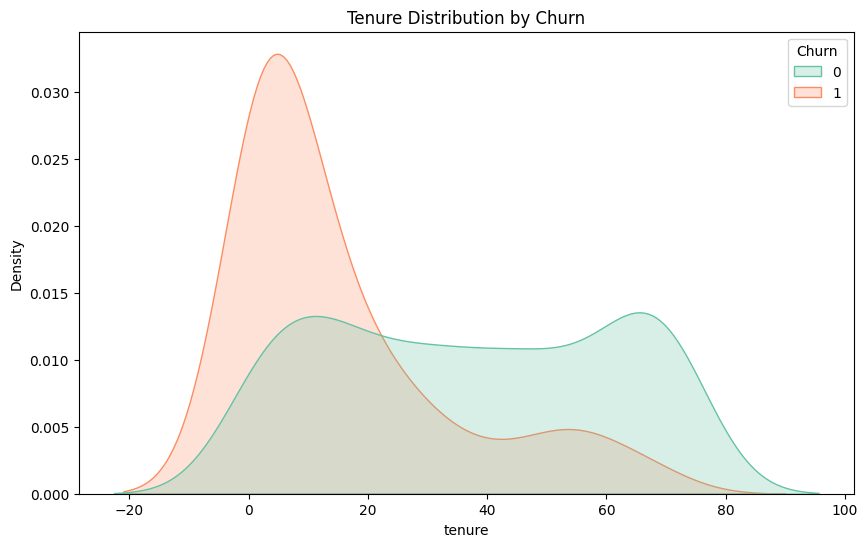

In [22]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='tenure', hue='Churn', common_norm=False, fill=True, palette='Set2')
plt.xlabel('tenure')
plt.ylabel('Density')
plt.title('Tenure Distribution by Churn')
plt.show()

<ipython-input-23-4b69e6f66bf5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn_rate = df.groupby('TenureGroup')['Churn'].mean()
<ipython-input-23-4b69e6f66bf5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_churn_rate.index, y=age_churn_rate.values, palette='pastel')


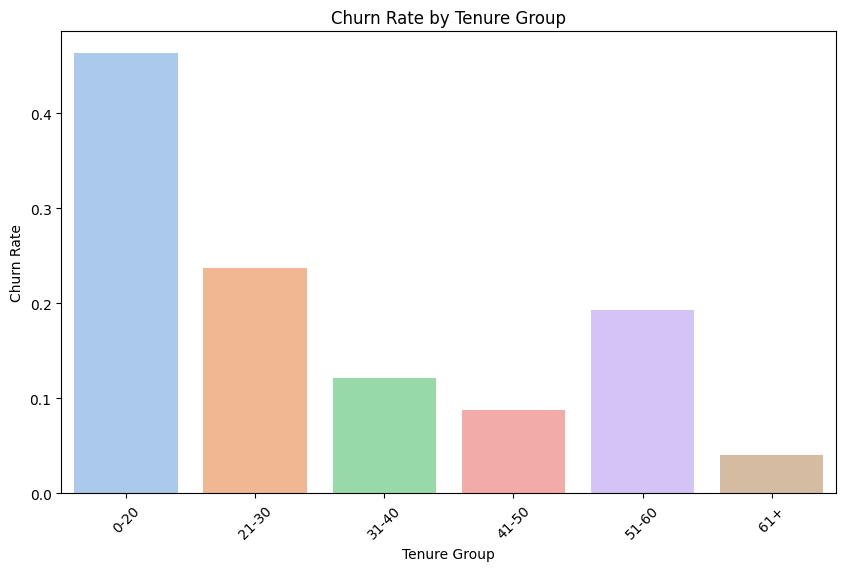

In [23]:
tenure_bins = [0, 20, 30, 40, 50, 60, float('inf')]
tenure_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['TenureGroup'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)
age_churn_rate = df.groupby('TenureGroup')['Churn'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_churn_rate.index, y=age_churn_rate.values, palette='pastel')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Tenure Group')
plt.xticks(rotation=45)
plt.show()

<ipython-input-24-b187961687f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tenure', y='tenure', data=df, estimator=lambda x: len(x) / len(df) * 100 , palette='Blues')


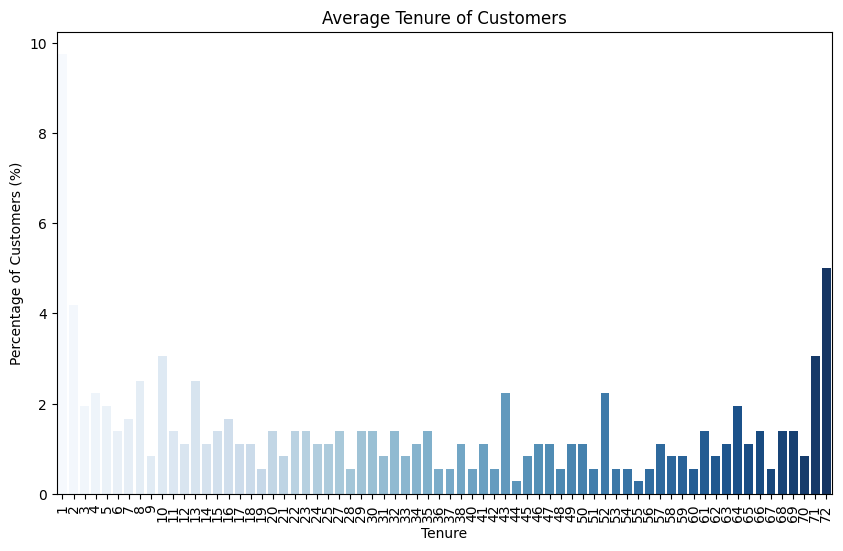

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='tenure', y='tenure', data=df, estimator=lambda x: len(x) / len(df) * 100 , palette='Blues')
plt.xlabel('Tenure')
plt.ylabel('Percentage of Customers (%)')
plt.title('Average Tenure of Customers')
plt.xticks(rotation=90)
plt.show()

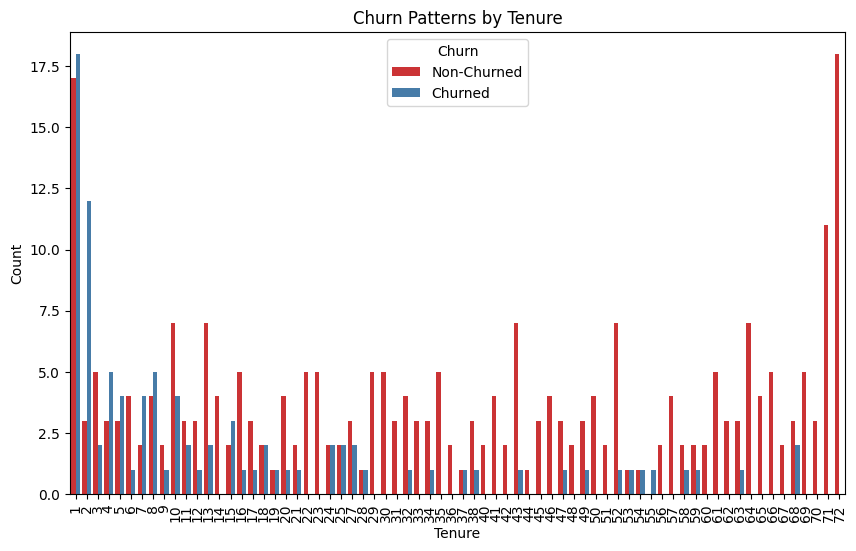

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='tenure', hue='Churn', data=df, palette='Set1')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Churn Patterns by Tenure')
plt.legend(title='Churn', labels=['Non-Churned', 'Churned'])
plt.xticks(rotation=90)
plt.show()

<ipython-input-26-66db0cc466df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='tenure', y='Churn', data=df, errorbar=None,  palette='Set2')


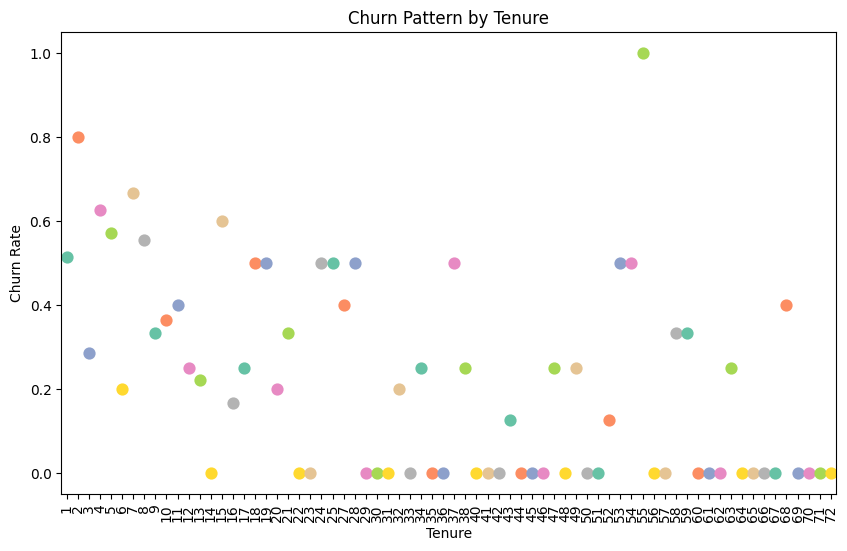

In [26]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='tenure', y='Churn', data=df, errorbar=None,  palette='Set2')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.title('Churn Pattern by Tenure')
plt.xticks(rotation=90)
plt.show()

### Visualization
**Tenure vs Churn**
- Customers with shorter tenures, particularly within the first 20 months, are highly prone to churn. This period is critical for retaining customers, suggesting that targeted retention strategies, such as personalized offers or enhanced customer service, are essential to reduce churn rates. As tenure increases, especially beyond 60 months, customers become significantly more loyal, and churn rates drop considerably.

## **Gender Vs Churn**

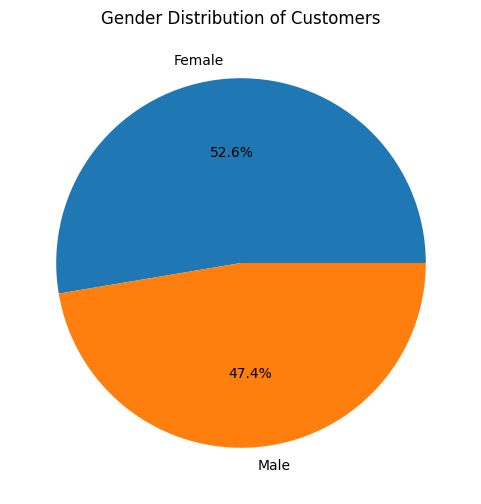

In [27]:
plt.figure(figsize=(6, 6))
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=unique_values_dict['gender'], autopct='%1.1f%%')
plt.title('Gender Distribution of Customers')
plt.show()

<ipython-input-28-ff453c475527>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values, palette='Set2')


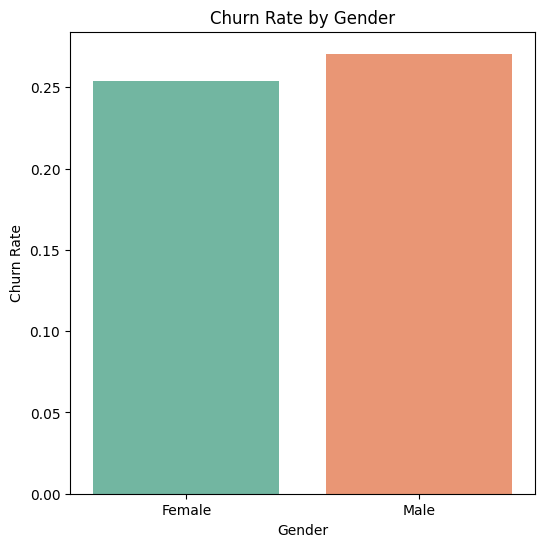

In [28]:
gender_churn_rate = df.groupby('gender')['Churn'].mean()

plt.figure(figsize=(6, 6))
sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values, palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.xticks([0, 1],unique_values_dict['gender'])
plt.title('Churn Rate by Gender')
plt.show()

More than half of the customers are Female

AND The churn rate of the both are almost equal.

## **MonthlyCharges Vs Churn**

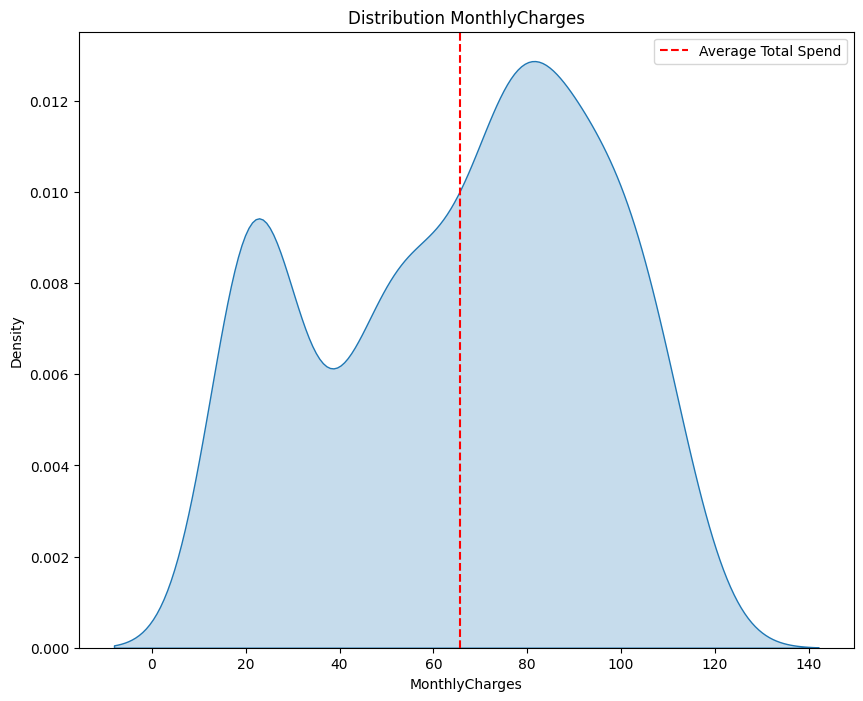

In [29]:
plt.figure(figsize = (10,8))
sns.kdeplot(data = df , x = 'MonthlyCharges' , fill = True )
plt.title('Distribution MonthlyCharges')
avg_total_spend = df.MonthlyCharges.mean()
plt.xlabel('MonthlyCharges')
plt.axvline(avg_total_spend , color = 'red' , linestyle = 'dashed' , label = 'Average Total Spend')
plt.legend()
plt.show()

<ipython-input-30-edc85ed29a8d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')


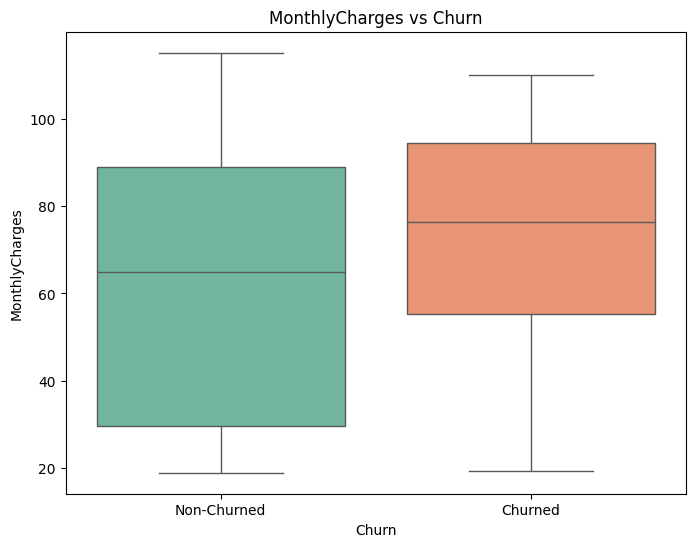

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.title('MonthlyCharges vs Churn')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.show()

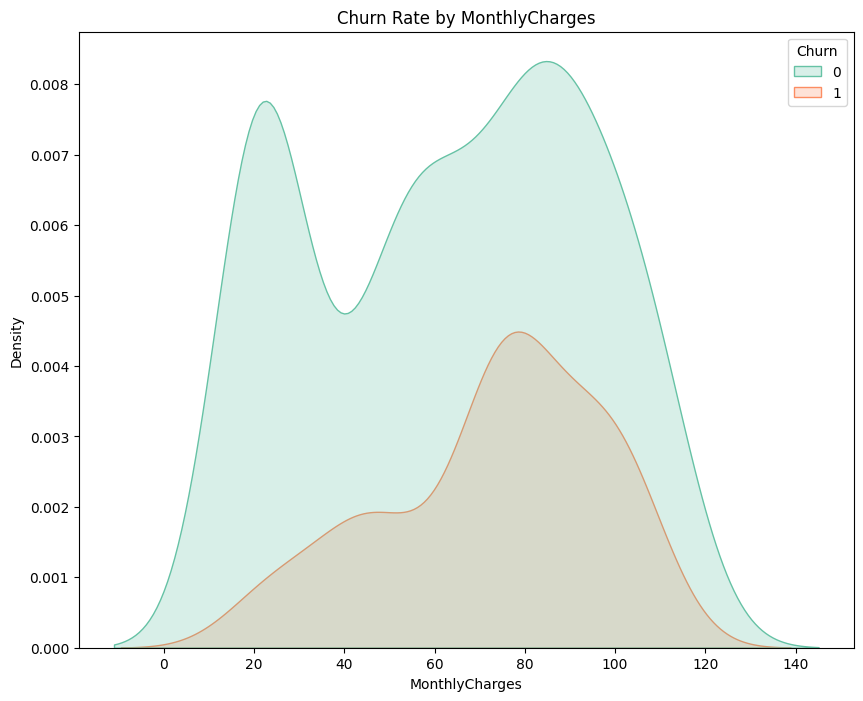

In [31]:
plt.figure(figsize = (10,8))
sns.kdeplot(data = df , x = 'MonthlyCharges' ,hue = 'Churn', fill = True , palette = 'Set2')
plt.title('Churn Rate by MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.show()

- Each customer on average spends about **65.7** per month

- most customers with who spend less than 60 tend less to churn

## **TotalCharges Vs Churn**

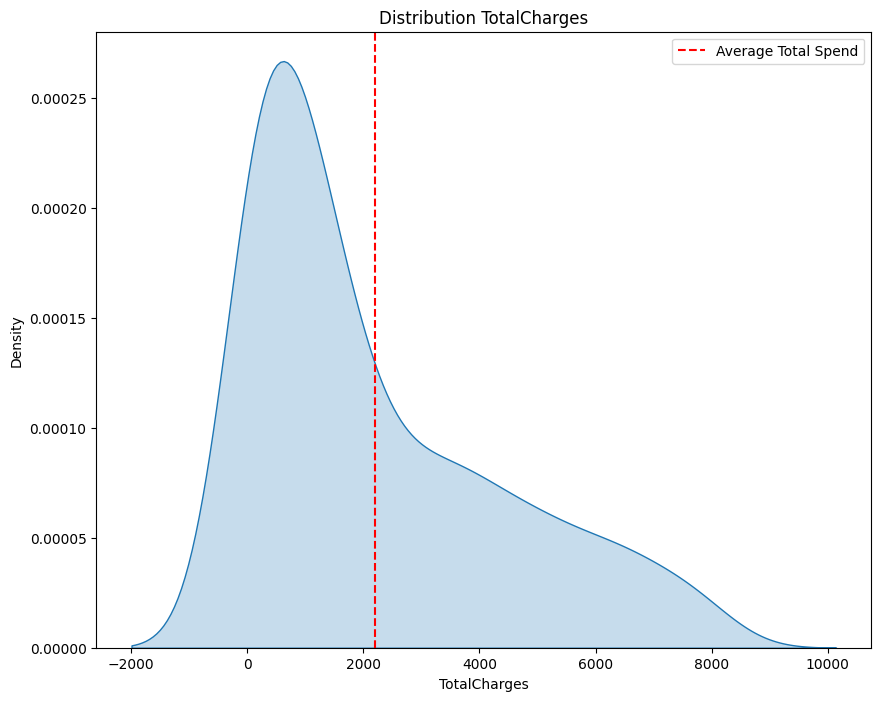

In [32]:
plt.figure(figsize = (10,8))
sns.kdeplot(data = df , x = 'TotalCharges' , fill = True )
plt.title('Distribution TotalCharges')
avg_total_spend = df.TotalCharges.mean()
plt.xlabel('TotalCharges')
plt.axvline(avg_total_spend , color = 'red' , linestyle = 'dashed' , label = 'Average Total Spend')
plt.legend()
plt.show()

<ipython-input-33-0720fa055943>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='Set2')


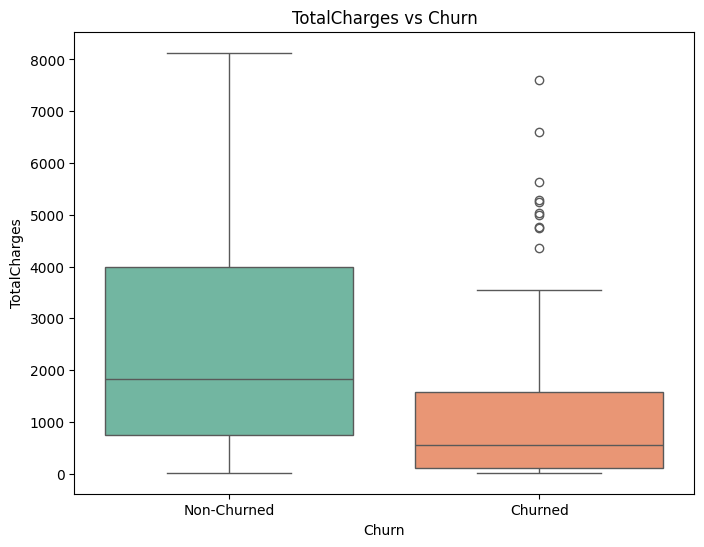

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='Set2')
plt.xlabel('Churn')
plt.ylabel('TotalCharges')
plt.title('TotalCharges vs Churn')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.show()

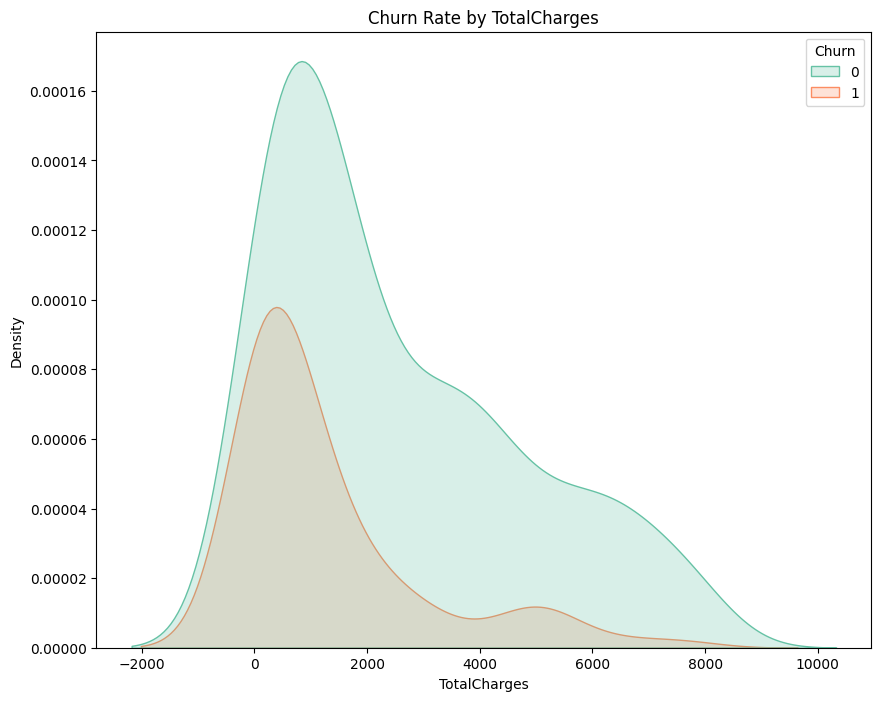

In [34]:
plt.figure(figsize = (10,8))
sns.kdeplot(data = df , x = 'TotalCharges' ,hue = 'Churn', fill = True , palette = 'Set2')
plt.title('Churn Rate by TotalCharges')
plt.xlabel('TotalCharges')
plt.show()

- Each customer on average spends about 2199 Total Charges

- most customers with who spend more than 2000 tend less to churn

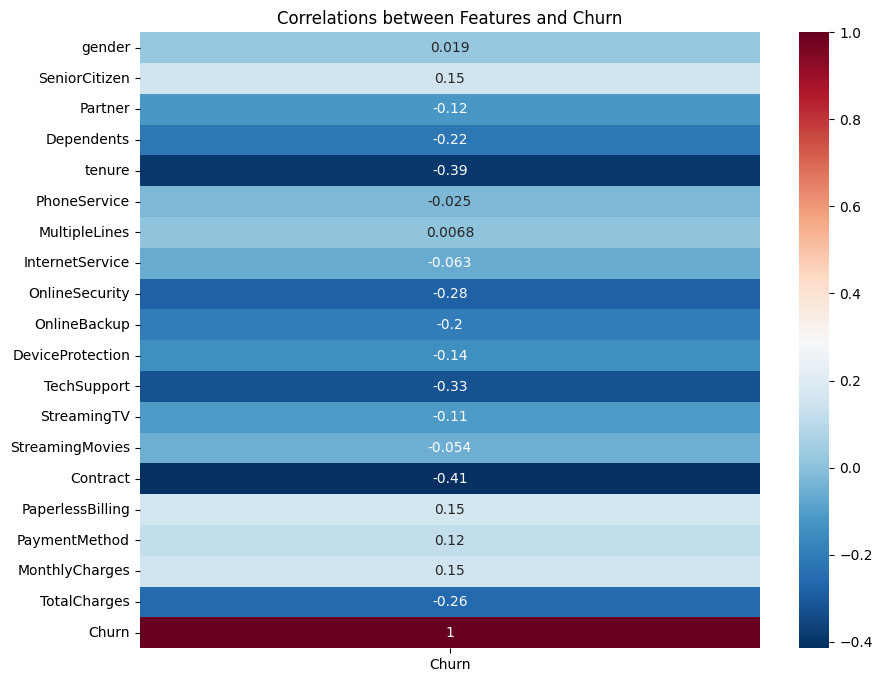

In [35]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Churn']], annot=True, cmap='RdBu_r')
plt.title('Correlations between Features and Churn')
plt.show()

- we realize that Contract feature has the highest correlation with Churn


<ipython-input-36-4ae6313a309e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_corr_vars, y=high_corr_values, palette='RdBu_r')


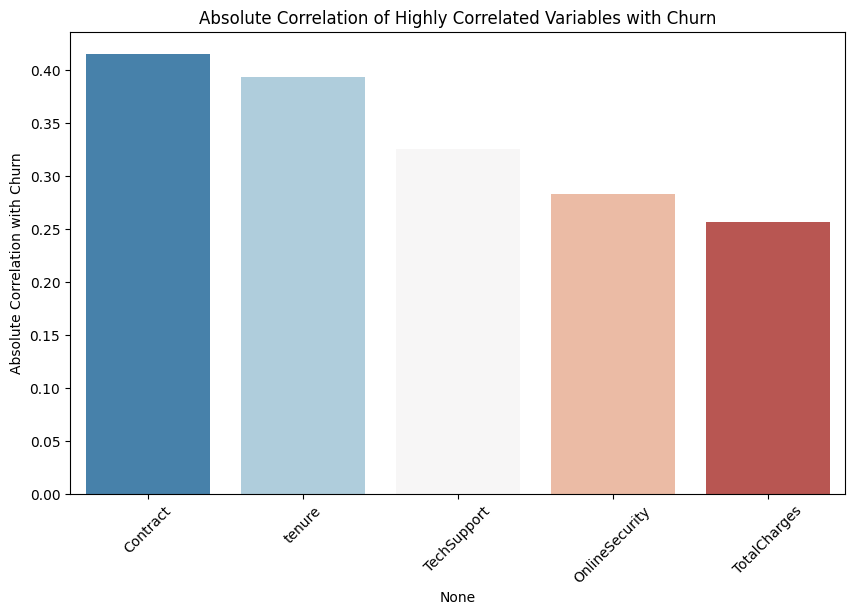

In [36]:
high_corr_vars = corr_matrix.abs().nlargest(6, 'Churn')['Churn'].index[1:]
high_corr_values = corr_matrix.abs().nlargest(6, 'Churn')['Churn'].values[1:]

plt.figure(figsize=(10, 6))
sns.barplot(x=high_corr_vars, y=high_corr_values, palette='RdBu_r')
plt.ylabel('Absolute Correlation with Churn')
plt.title('Absolute Correlation of Highly Correlated Variables with Churn')
plt.xticks(rotation=45)
plt.show()

- The plot shows the features that have the highest correlation with the target variable (Churn)


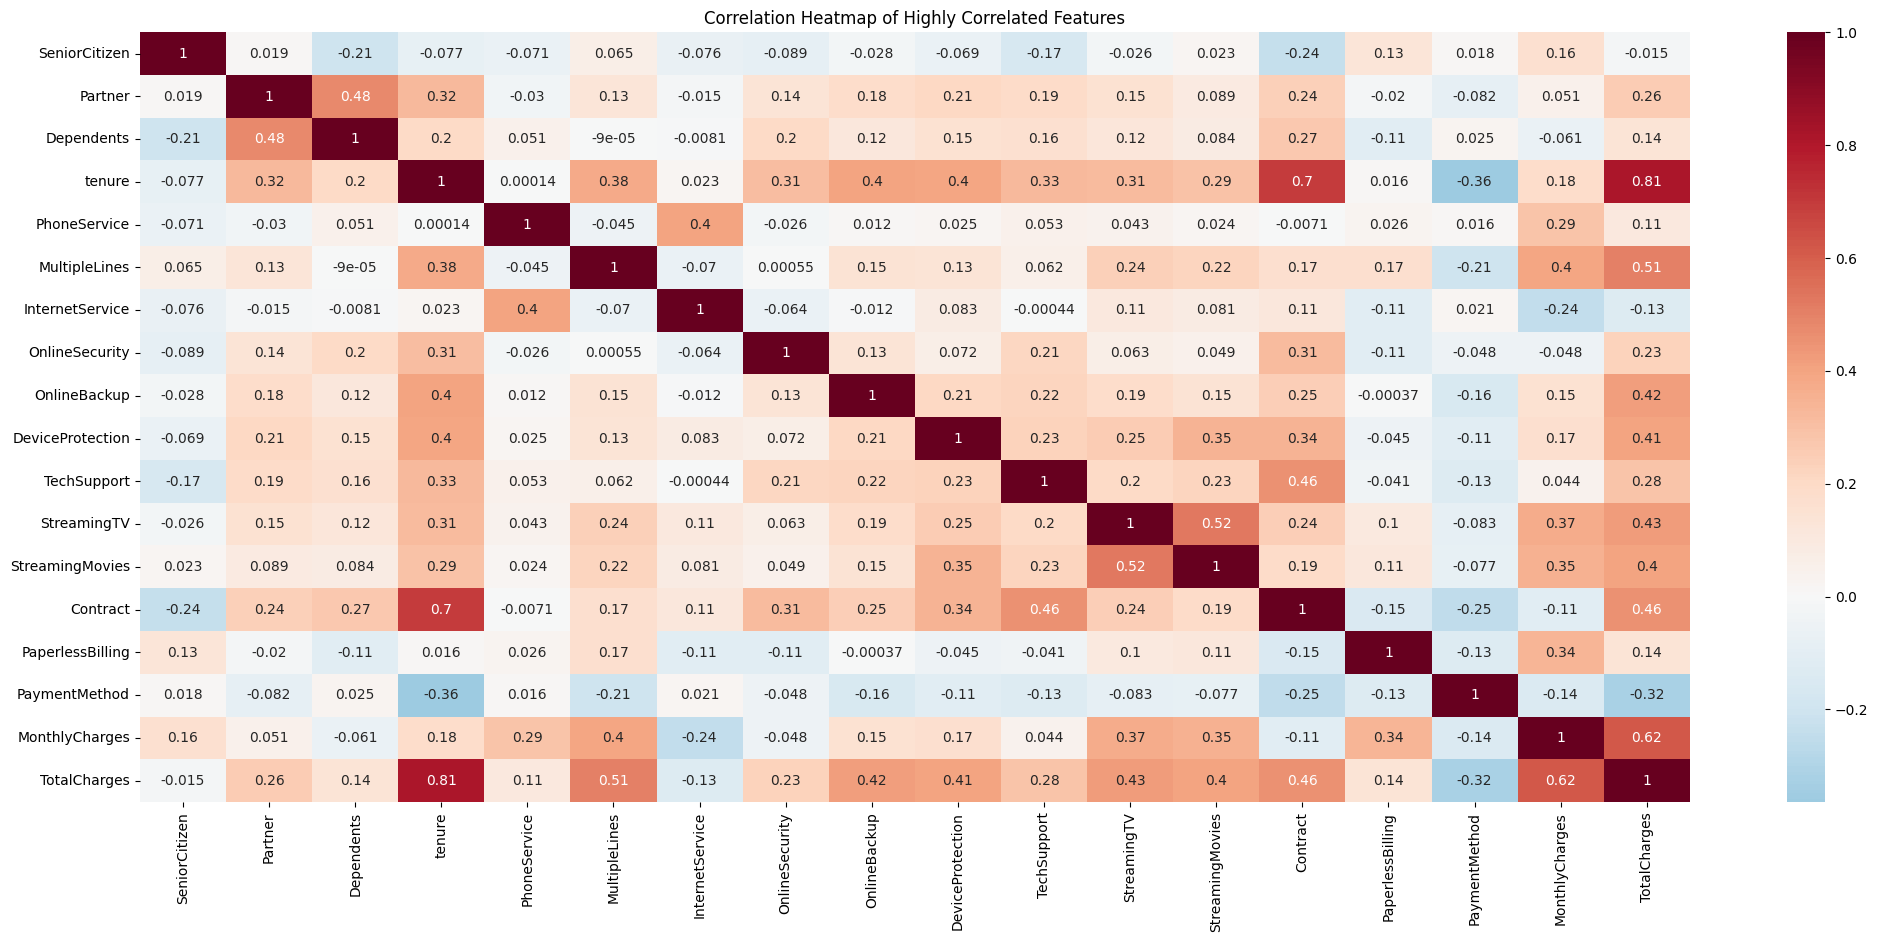

In [37]:
corr_matrix = df.drop(columns=['Churn']).corr(numeric_only=True)

high_corr_features = []
for column in corr_matrix.columns:
    max_corr = corr_matrix[column].drop(index=column).abs().max()
    if max_corr > 0.2:
        high_corr_features.append(column)

plt.figure(figsize=(25, 10))
sns.heatmap(df[high_corr_features].corr(), annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap of Highly Correlated Features')
plt.show()

- The plot shows the corelation of all features among them
- Total charge havily depends on Monthly Charges and Tenure

<ipython-input-38-cf6a927b31b2>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=internet_churn_rate.index, y=internet_churn_rate.values, palette='Set2')
<ipython-input-38-cf6a927b31b2>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phone_churn_rate.index, y=phone_churn_rate.values, palette='Set3')
<ipython-input-38-cf6a927b31b2>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stream_mov_churn_rate.index, y=stream_mov_churn_rate.values, palette='Set1')
<ipython-input-38-cf6a927b31b2>:43: FutureWarning: 

Passing `palette` without

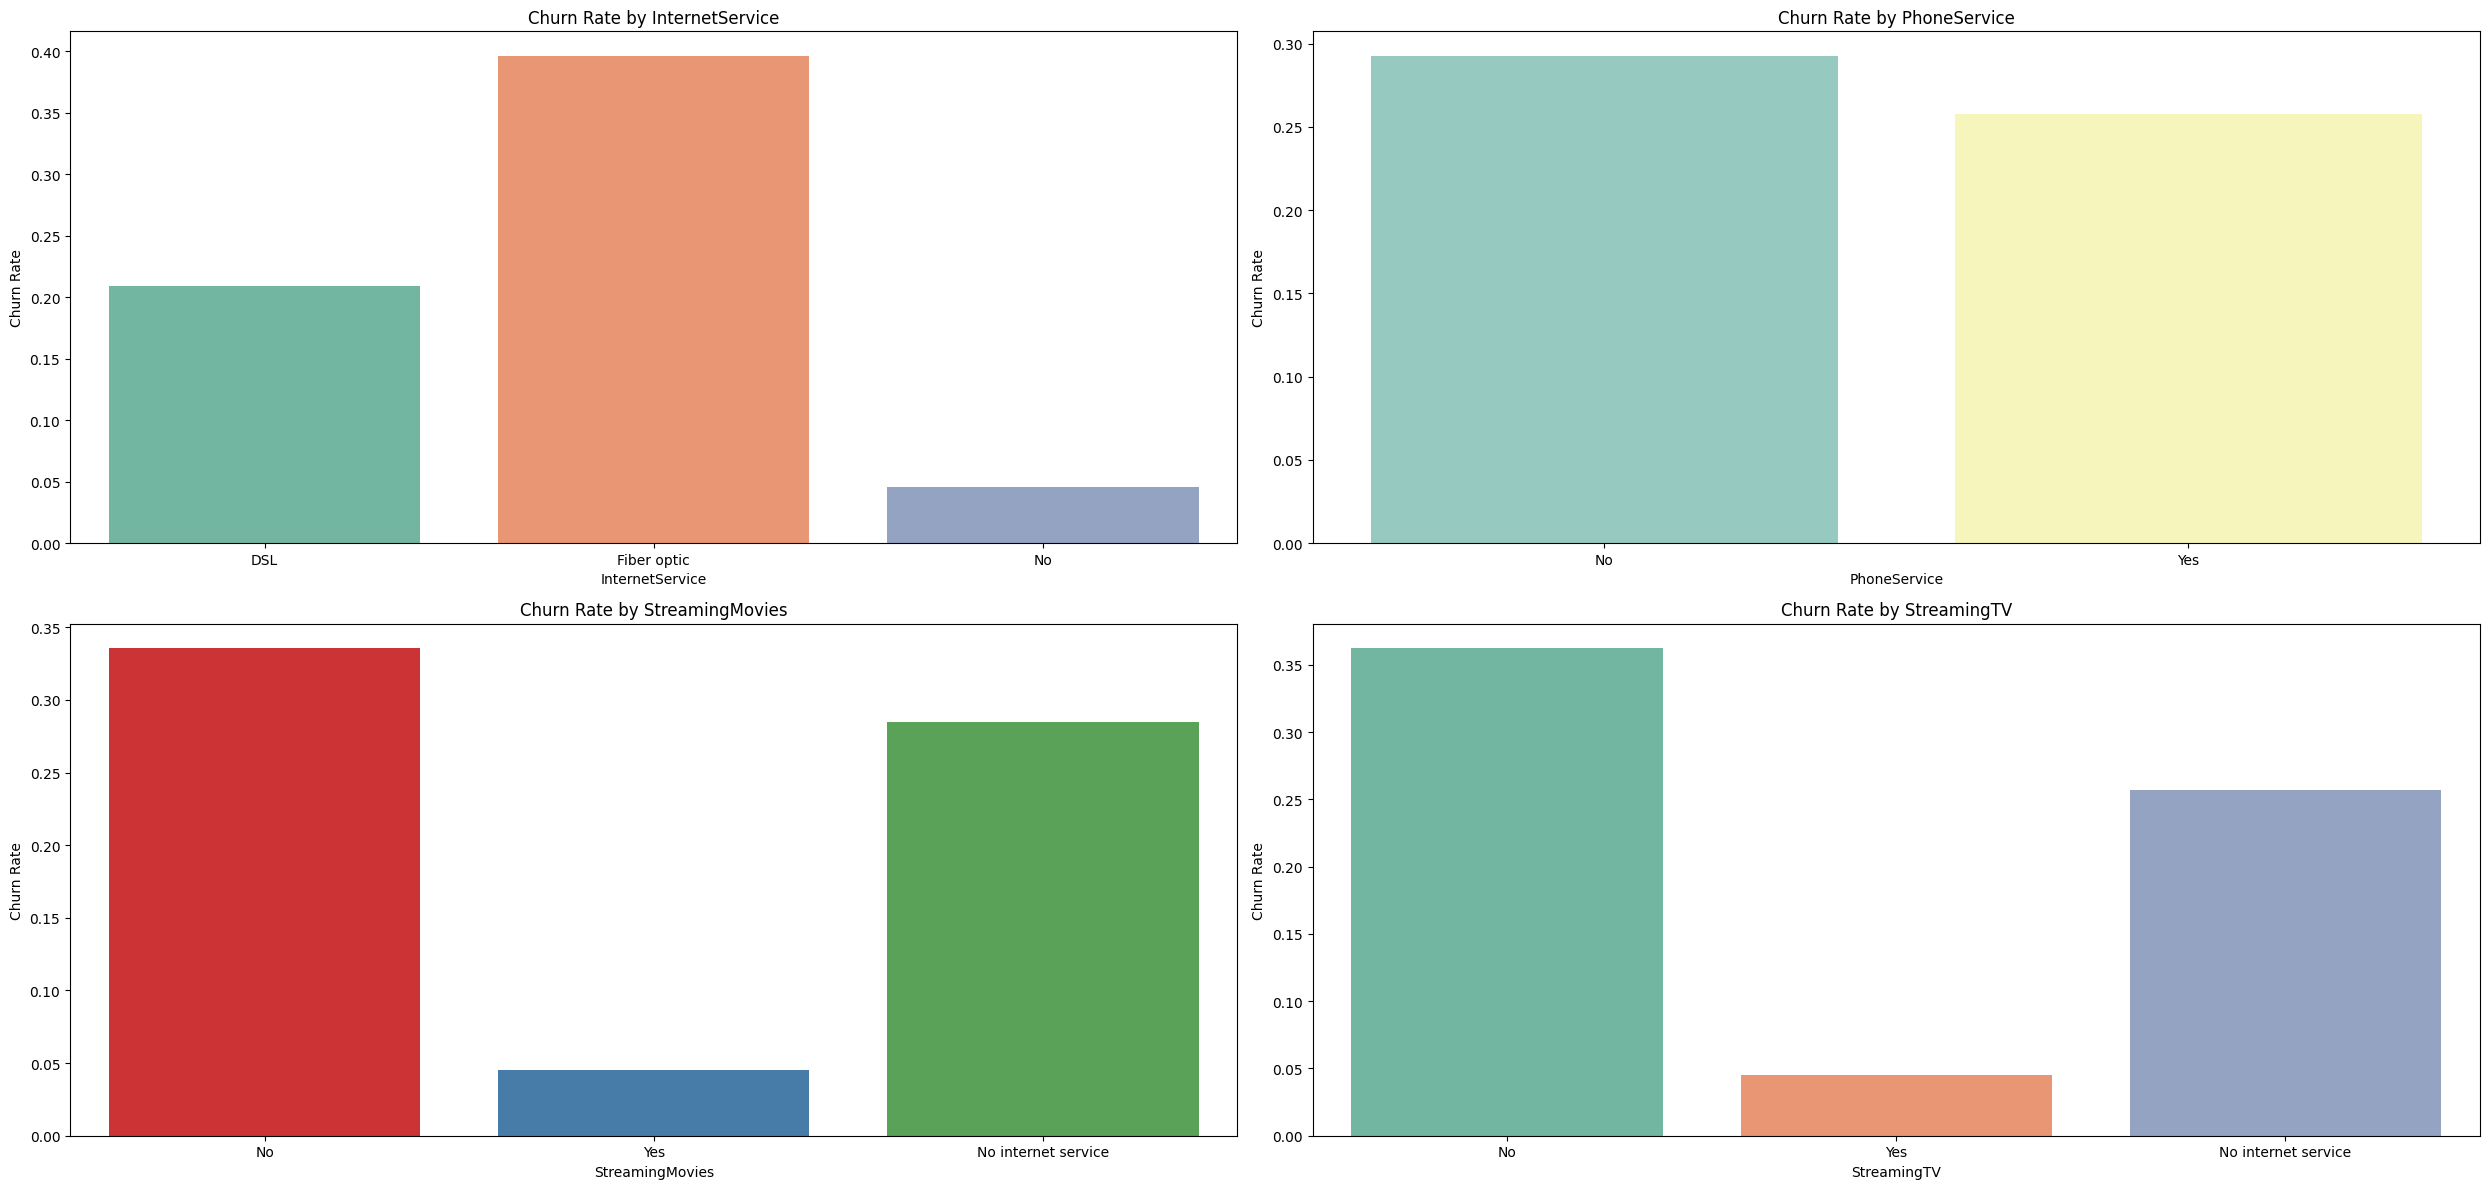

In [38]:
internet_churn_rate = df.groupby('InternetService')['Churn'].mean()
phone_churn_rate = df.groupby('PhoneService')['Churn'].mean()
stream_mov_churn_rate = df.groupby('StreamingMovies')['Churn'].mean()
stream_tv_churn_rate = df.groupby('StreamingTV')['Churn'].mean()

# Create a new DataFrame to combine the churn rates
churn_rates = pd.DataFrame({
    'InternetService': internet_churn_rate,
    'PhoneService': phone_churn_rate,
    'StreamingMovies': stream_mov_churn_rate,
    'StreamingTV': stream_tv_churn_rate
})

# Plotting
plt.figure(figsize=(25, 12))

# Plot for 'InternetService'
plt.subplot(2,2,1)
sns.barplot(x=internet_churn_rate.index, y=internet_churn_rate.values, palette='Set2')
plt.xlabel('InternetService')
plt.ylabel('Churn Rate')
plt.xticks([0, 1,2],unique_values_dict['InternetService'])
plt.title('Churn Rate by InternetService')

# Plot for 'PhoneService'
plt.subplot(2,2,2)
sns.barplot(x=phone_churn_rate.index, y=phone_churn_rate.values, palette='Set3')
plt.xlabel('PhoneService')
plt.ylabel('Churn Rate')
plt.xticks([0, 1],unique_values_dict['PhoneService'])
plt.title('Churn Rate by PhoneService')

# Plot for 'StreamingMovies'
plt.subplot(2,2,3)
sns.barplot(x=stream_mov_churn_rate.index, y=stream_mov_churn_rate.values, palette='Set1')
plt.xlabel('StreamingMovies')
plt.ylabel('Churn Rate')
plt.xticks([0, 1,2],unique_values_dict['StreamingMovies'])
plt.title('Churn Rate by StreamingMovies')

# Plot for 'StreamingTV'
plt.subplot(2,2,4)
sns.barplot(x=stream_tv_churn_rate.index, y=stream_tv_churn_rate.values, palette='Set2')
plt.xlabel('StreamingTV')
plt.ylabel('Churn Rate')
plt.xticks([0, 1,2],unique_values_dict['StreamingTV'])
plt.title('Churn Rate by StreamingTV')

plt.tight_layout()
plt.show()

- In **Internet Services** Fiber Optic has the heighest Churning Rate.
- In **Streaming Movies** and in **Streaming TV** those who have taken the service is less tend to Churn.
- Also in **PhoneService** those who have taken the service is less tend to Churn.


# Task 2: Data Preprocessing and Feature Engineering
## Feature Encoding:
Many columns are categorical (e.g., gender, Partner, InternetService, etc.). Convert these categorical variables into
numeric format using appropriate encoding methods (e.g., One-Hot Encoding or Label Encoding).
## Feature Scaling:
For numerical features like tenure, MonthlyCharges, and TotalCharges, apply scaling techniques such as StandardScaler or MinMaxScaler to normalize the data if necessary.
## Feature Engineering:
Create new features if applicable. For example, you can create a feature that combines StreamingTV and
StreamingMovies to check if a customer subscribes to both services.
Consider creating a new feature that represents the average monthly charge over the customer&#39;s tenure by dividing
TotalCharges by tenure.

## Feature Scaling:

In [39]:
df=df.drop(columns=['customerID'])

In [40]:
df=df.drop(columns=['TenureGroup'])

In [41]:
data=df

In [42]:
columns=['tenure', 'MonthlyCharges', 'TotalCharges']

In [43]:
scaler={}
from sklearn.preprocessing import StandardScaler
for i in columns:
  scaler[i] = StandardScaler()
  df[[i]] = scaler[i].fit_transform(df[[i]])


In [44]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,359.000000,359.000000,359.000000,359.000000,3.590000e+02,359.000000,359.000000,359.000000,359.00000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,3.590000e+02,3.590000e+02,359.000000
mean,0.473538,0.169916,0.470752,0.309192,1.979228e-17,0.885794,0.883008,0.810585,0.81337,0.958217,0.841226,0.763231,0.986072,0.986072,0.690808,0.596100,1.582173,8.411718e-17,-1.261758e-16,0.261838
std,0.499996,0.376084,0.499840,0.462806,1.001396e+00,0.318505,0.935170,0.722967,0.88516,0.903706,0.890593,0.873052,0.904567,0.904567,0.840124,0.491363,1.048177,1.001396e+00,1.001396e+00,0.440249
min,0.000000,0.000000,0.000000,0.000000,-1.240847e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.602679e+00,-1.003452e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-9.555803e-01,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.280686e-01,-8.194239e-01,0.000000
50%,0.000000,0.000000,0.000000,0.000000,-1.812856e-01,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.773803e-01,-4.010028e-01,0.000000
75%,1.000000,0.000000,1.000000,1.000000,8.782757e-01,1.000000,2.000000,1.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,8.181332e-01,6.210872e-01,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.652571e+00,1.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.691887e+00,2.729371e+00,1.000000


## Feature Engineering

In [45]:
df['Streaming'] = ((df['StreamingTV'] == 1) & (df['StreamingMovies'] == 1)).astype(int)
df['average_monthly_charge'] = (df['TotalCharges']/df['tenure']).astype(float)

In [46]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Streaming,average_monthly_charge
count,359.000000,359.000000,359.000000,359.000000,3.590000e+02,359.000000,359.000000,359.000000,359.00000,359.000000,...,359.000000,359.000000,359.000000,359.000000,359.000000,3.590000e+02,3.590000e+02,359.000000,359.000000,359.000000
mean,0.473538,0.169916,0.470752,0.309192,1.979228e-17,0.885794,0.883008,0.810585,0.81337,0.958217,...,0.986072,0.986072,0.690808,0.596100,1.582173,8.411718e-17,-1.261758e-16,0.261838,0.183844,0.688756
std,0.499996,0.376084,0.499840,0.462806,1.001396e+00,0.318505,0.935170,0.722967,0.88516,0.903706,...,0.904567,0.904567,0.840124,0.491363,1.048177,1.001396e+00,1.001396e+00,0.440249,0.387898,2.851063
min,0.000000,0.000000,0.000000,0.000000,-1.240847e+00,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.602679e+00,-1.003452e+00,0.000000,0.000000,-31.635267
25%,0.000000,0.000000,0.000000,0.000000,-9.555803e-01,1.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,-7.280686e-01,-8.194239e-01,0.000000,0.000000,0.559038
50%,0.000000,0.000000,0.000000,0.000000,-1.812856e-01,1.000000,0.000000,1.000000,0.00000,1.000000,...,1.000000,1.000000,0.000000,1.000000,2.000000,1.773803e-01,-4.010028e-01,0.000000,0.000000,0.801116
75%,1.000000,0.000000,1.000000,1.000000,8.782757e-01,1.000000,2.000000,1.000000,2.00000,2.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,8.181332e-01,6.210872e-01,1.000000,0.000000,1.200777
max,1.000000,1.000000,1.000000,1.000000,1.652571e+00,1.000000,2.000000,2.000000,2.00000,2.000000,...,2.000000,2.000000,2.000000,1.000000,3.000000,1.691887e+00,2.729371e+00,1.000000,1.000000,17.107220


# Task 3: Train-Test Split and Model Building
## Train-Test Split:
Split the dataset into training and test sets using train_test_split from sklearn. Use a test size of 20% and set the
random state to ensure reproducibility.
## Model Selection:
Build a models to predict customer churn. You can use any of the following models:
- Logistic Regression
- Random Forest
- Gradient Boosting
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)
Make sure to explain why you chose the models you are using.

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=["Churn"]),df["Churn"],test_size=0.2,random_state=41,stratify=df["Churn"])
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(287, 21) (72, 21) (287,) (72,)


In [48]:
#from imblearn.over_sampling import SMOTE
#from collections import Counter
#
#counter = Counter(y_train)
#print('Before', counter)
#
## oversampling the train dataset using SMOTE
#smt = SMOTE()
#x_train, y_train = smt.fit_resample(x_train, y_train)
#
#counter = Counter(y_train)
#print('After', counter)

In [49]:
#from sklearn.utils import shuffle
#x_train, y_train = shuffle(x_train, y_train)

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [51]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine (SVM)': SVC(kernel= 'linear',probability=True),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier()
}

In [52]:
x_train.shape

(287, 21)

In [53]:
y_train.shape

(287,)

In [54]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')

Logistic Regression Accuracy: 0.78
Random Forest Accuracy: 0.76
Gradient Boosting Accuracy: 0.76
Support Vector Machine (SVM) Accuracy: 0.81
K-Nearest Neighbors (KNN) Accuracy: 0.78


# Task 4: Model Evaluation
## Evaluation Metrics:
Evaluate the models using appropriate metrics such as:
- Accuracy
- Precision
- Recall
- F1-score
- ROC-AUC Curve

Provide a classification report for each model and compare their performances.
## Confusion Matrix:
Plot and analyze the confusion matrix for the best-performing model.
## Feature Importance:
For tree-based models like Random Forest or Gradient Boosting, provide the feature importance scores and discuss
which features are the most important for predicting customer churn.

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay

Logistic Regression
Accuracy: 0.7778
Precision: 0.6154
Recall: 0.4211
F1 Score: 0.5000
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        53
           1       0.62      0.42      0.50        19

    accuracy                           0.78        72
   macro avg       0.71      0.66      0.68        72
weighted avg       0.76      0.78      0.76        72

ROC-AUC Score: 0.7547


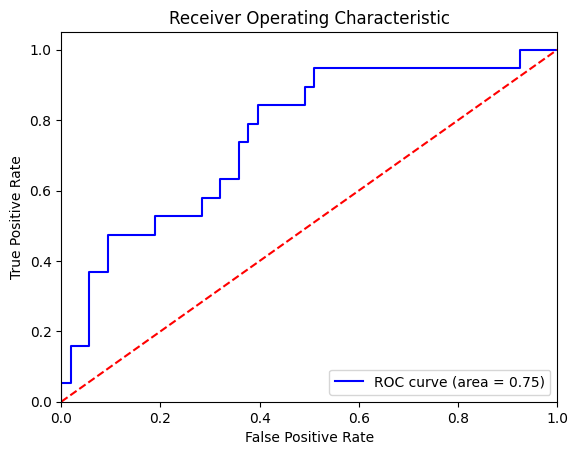

--------------------------------------------
Random Forest
Accuracy: 0.7639
Precision: 0.6000
Recall: 0.3158
F1 Score: 0.4138
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        53
           1       0.60      0.32      0.41        19

    accuracy                           0.76        72
   macro avg       0.70      0.62      0.63        72
weighted avg       0.74      0.76      0.74        72

ROC-AUC Score: 0.7398


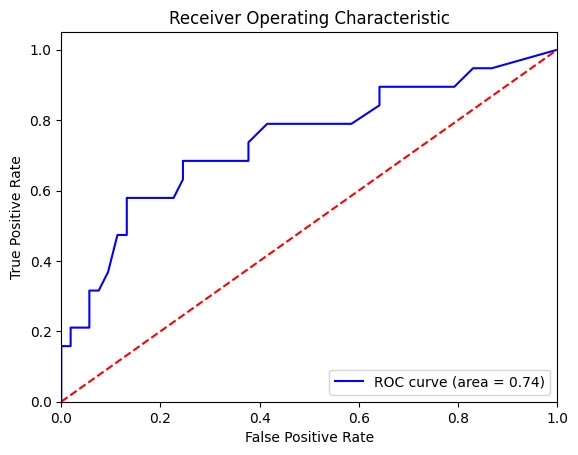

--------------------------------------------
Gradient Boosting
Accuracy: 0.7639
Precision: 0.6000
Recall: 0.3158
F1 Score: 0.4138
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        53
           1       0.60      0.32      0.41        19

    accuracy                           0.76        72
   macro avg       0.70      0.62      0.63        72
weighted avg       0.74      0.76      0.74        72

ROC-AUC Score: 0.6634


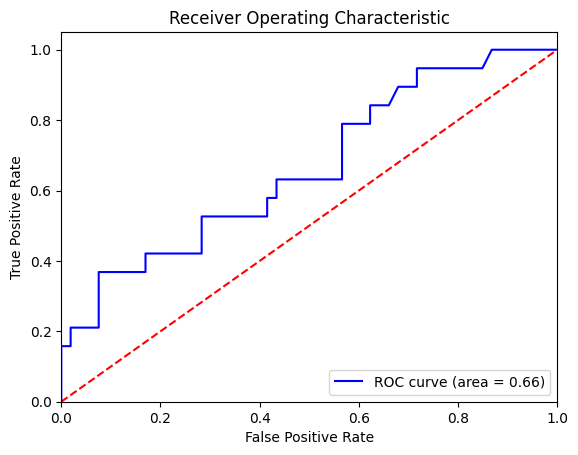

--------------------------------------------
Support Vector Machine (SVM)
Accuracy: 0.8056
Precision: 0.6667
Recall: 0.5263
F1 Score: 0.5882
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        53
           1       0.67      0.53      0.59        19

    accuracy                           0.81        72
   macro avg       0.75      0.72      0.73        72
weighted avg       0.80      0.81      0.80        72

ROC-AUC Score: 0.7617


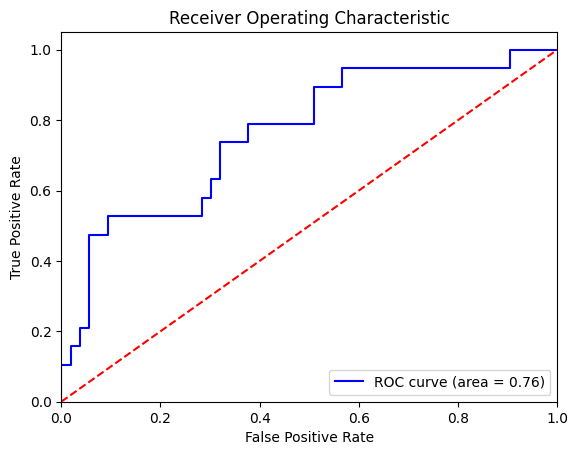

--------------------------------------------
K-Nearest Neighbors (KNN)
Accuracy: 0.7778
Precision: 0.6154
Recall: 0.4211
F1 Score: 0.5000
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        53
           1       0.62      0.42      0.50        19

    accuracy                           0.78        72
   macro avg       0.71      0.66      0.68        72
weighted avg       0.76      0.78      0.76        72

ROC-AUC Score: 0.7468


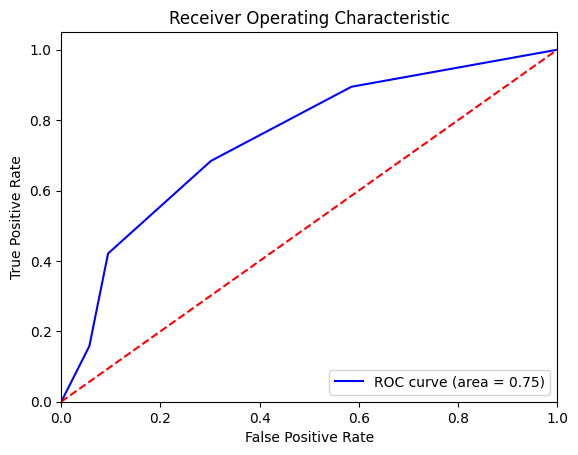

--------------------------------------------


In [56]:
m_name,acc,pre,rec,f1s,roc,=[],[],[],[],[],[]
for name, model in models.items():
    y_pred = model.predict(x_test)
    y_pred_proba=model.predict_proba(x_test)[:, 1]
    print(f'{name}')
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    m_name.append(name)
    acc.append(accuracy)
    pre.append(precision)
    rec.append(recall)
    f1s.append(f1)
    roc.append(roc_auc)
    print("--------------------------------------------")

In [57]:
data = {
    'Model':m_name,
    'Accuracy':acc,
    'Precision':pre,
    'Recall':rec,
    'F1-score':f1s,
    'ROC-AUC Score':roc
}
data = pd.DataFrame(data)
data


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC Score
0,Logistic Regression,0.777778,0.615385,0.421053,0.500000,0.754717
1,Random Forest,0.763889,0.600000,0.315789,0.413793,0.739821
2,Gradient Boosting,0.763889,0.600000,0.315789,0.413793,0.663357
3,Support Vector Machine (SVM),0.805556,0.666667,0.526316,0.588235,0.761668
4,K-Nearest Neighbors (KNN),0.777778,0.615385,0.421053,0.500000,0.746773


### The **SVM** model has the highest values in several key metrics, including **accuracy (0.805556), precision (0.666667), recall (0.526316), F1-score (0.588235)**, and a strong **ROC-AUC score (0.761668)**. This indicates that the SVM model provides the best balance of performance across all critical metrics, making it the most well-rounded and reliable choice overall.



In [58]:
import numpy as np

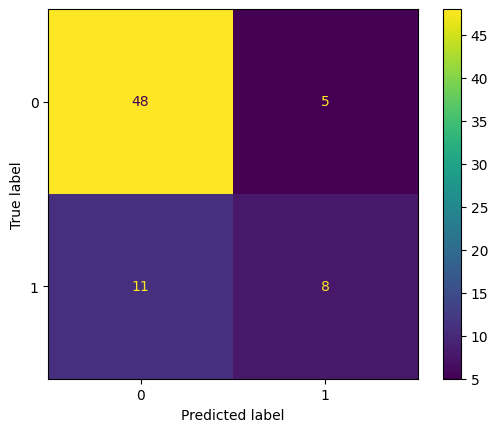

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        53
           1       0.62      0.42      0.50        19

    accuracy                           0.78        72
   macro avg       0.71      0.66      0.68        72
weighted avg       0.76      0.78      0.76        72



In [59]:
best_model=models["Support Vector Machine (SVM)"]
y_pred = model.predict(x_test)
confusion_matrix = confusion_matrix(np.array(y_test), y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
print(classification_report(y_test, y_pred))

In [60]:
feature_names = x_train.columns
import numpy as np

Random Forest
                   Feature  Gini Importance   Cum_Sum
18            TotalCharges         0.138770  0.138770
4                   tenure         0.136325  0.275095
17          MonthlyCharges         0.123829  0.398924
20  average_monthly_charge         0.107701  0.506625
11             TechSupport         0.086957  0.593582
14                Contract         0.061408  0.654990
16           PaymentMethod         0.047878  0.702868
8           OnlineSecurity         0.045771  0.748640
1            SeniorCitizen         0.030044  0.778684
7          InternetService         0.027023  0.805707
9             OnlineBackup         0.025886  0.831593
6            MultipleLines         0.023574  0.855167
15        PaperlessBilling         0.022813  0.877980
0                   gender         0.022375  0.900355
10        DeviceProtection         0.021188  0.921543
12             StreamingTV         0.017534  0.939077
13         StreamingMovies         0.014810  0.953887
2             

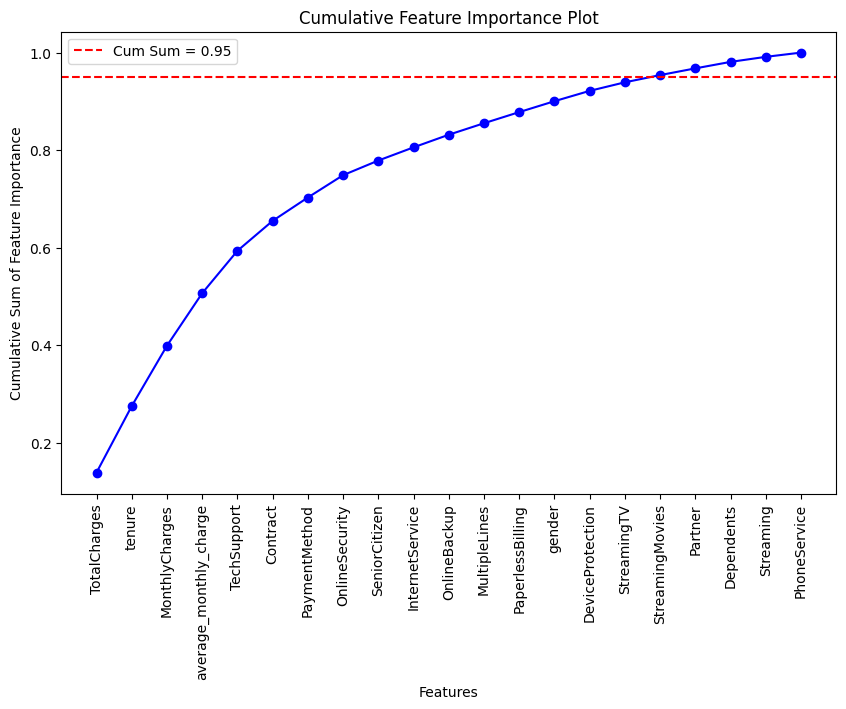

-------------------------------------------------
Gradient Boosting
                   Feature  Gini Importance   Cum_Sum
14                Contract         0.192118  0.192118
17          MonthlyCharges         0.179204  0.371322
11             TechSupport         0.150654  0.521977
18            TotalCharges         0.137415  0.659392
20  average_monthly_charge         0.123319  0.782711
4                   tenure         0.098929  0.881640
16           PaymentMethod         0.038081  0.919721
8           OnlineSecurity         0.017377  0.937098
1            SeniorCitizen         0.016956  0.954054
15        PaperlessBilling         0.010759  0.964813
6            MultipleLines         0.008637  0.973450
9             OnlineBackup         0.008177  0.981627
13         StreamingMovies         0.004004  0.985631
0                   gender         0.003996  0.989627
7          InternetService         0.003818  0.993444
10        DeviceProtection         0.003217  0.996661
12            

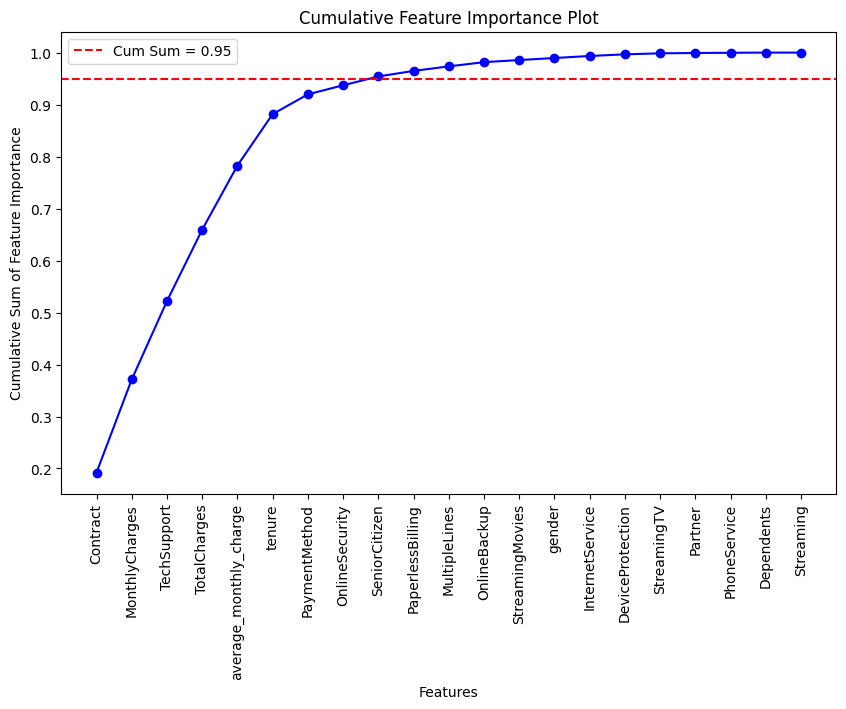

-------------------------------------------------


In [61]:
tree_model=["Random Forest","Gradient Boosting"]
for i in tree_model:
  print(i)
  importances = models[i].feature_importances_
  feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
  feature_imp_df['Cum_Sum']=np.cumsum(feature_imp_df['Gini Importance'])
  print(feature_imp_df)
  threshold = 0.95
  feature_at_threshold = feature_imp_df[feature_imp_df['Cum_Sum'] >= threshold].index[0]
  cumsum_at_threshold = feature_imp_df.loc[feature_at_threshold, 'Cum_Sum']
  plt.figure(figsize=(10, 6))
  plt.plot(feature_imp_df['Feature'], feature_imp_df['Cum_Sum'], marker='o', linestyle='-', color='b')
  plt.xlabel('Features')
  plt.ylabel('Cumulative Sum of Feature Importance')
  plt.title('Cumulative Feature Importance Plot')
  plt.xticks(rotation=90)
  plt.axhline(y=threshold, color='r', linestyle='--', label=f'Cum Sum = {threshold}')
  plt.legend()
  plt.show()
  print("-------------------------------------------------")

In [62]:
imp_features=list(feature_imp_df.head(10).Feature)
feature_imp_df.head(10)

,Feature,Gini Importance,Cum_Sum
14,Contract,0.192118,0.192118
17,MonthlyCharges,0.179204,0.371322
11,TechSupport,0.150654,0.521977
18,TotalCharges,0.137415,0.659392
20,average_monthly_charge,0.123319,0.782711
4,tenure,0.098929,0.881640
16,PaymentMethod,0.038081,0.919721
8,OnlineSecurity,0.017377,0.937098
1,SeniorCitizen,0.016956,0.954054
15,PaperlessBilling,0.010759,0.964813


In [63]:
print("Important Features:-")
print(imp_features)

Important Features:-
['Contract', 'MonthlyCharges', 'TechSupport', 'TotalCharges', 'average_monthly_charge', 'tenure', 'PaymentMethod', 'OnlineSecurity', 'SeniorCitizen', 'PaperlessBilling']


## Important Features:-
1: 'Contract',

2: 'MonthlyCharges',

3: 'TechSupport',

4: 'average_monthly_charge',

5: 'TotalCharges',

6: 'tenure',

7: 'PaymentMethod',

8: 'OnlineSecurity',

9: 'SeniorCitizen',

10:'PaperlessBilling'

## Task 5: Hyperparameter Tuning
### Grid Search/Random Search:
- Perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV to optimize the performance of the
best-performing model.
- Document the hyperparameters used and explain how tuning improved the models performance.

In [64]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf','linear']}

grid = GridSearchCV(best_model, param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.741 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.741 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.737 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.737 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.737 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.810 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.828 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.860 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.754 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.719 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.741 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(kernel='linear', probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [65]:
print(grid.best_params_)


{'C': 10, 'gamma': 1, 'kernel': 'linear'}


In [66]:

print(grid.best_estimator_)

SVC(C=10, gamma=1, kernel='linear', probability=True)


In [67]:
y_pred = grid.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        53
           1       0.67      0.53      0.59        19

    accuracy                           0.81        72
   macro avg       0.75      0.72      0.73        72
weighted avg       0.80      0.81      0.80        72



In [68]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

Accuracy: 0.8056
Precision: 0.6667
Recall: 0.5263
F1 Score: 0.5882
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        53
           1       0.67      0.53      0.59        19

    accuracy                           0.81        72
   macro avg       0.75      0.72      0.73        72
weighted avg       0.80      0.81      0.80        72

ROC-AUC Score: 0.7686


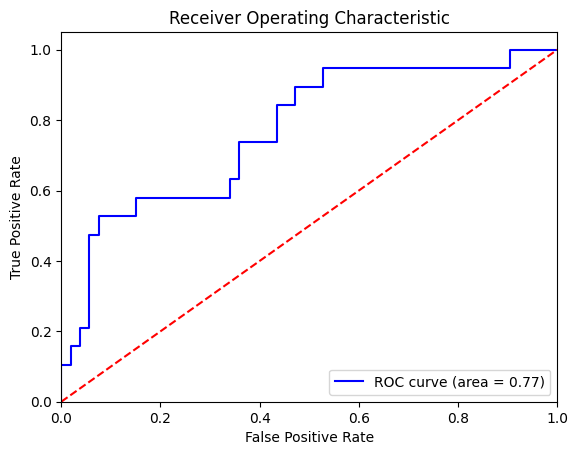

<Figure size 640x480 with 0 Axes>

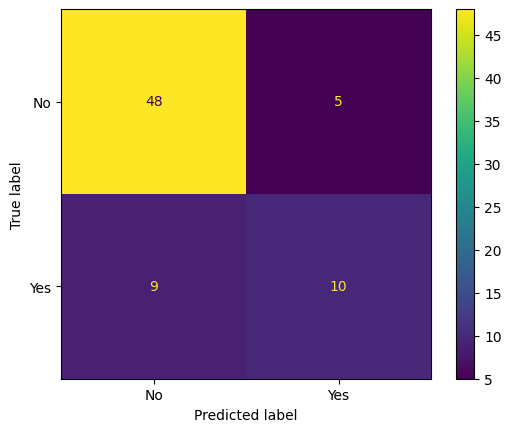

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        53
           1       0.67      0.53      0.59        19

    accuracy                           0.81        72
   macro avg       0.75      0.72      0.73        72
weighted avg       0.80      0.81      0.80        72



In [69]:
model=SVC(C=10, gamma=1, kernel='linear', probability=True)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_proba=model.predict_proba(x_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
plt.figure()
cm = confusion_matrix(np.array(y_test), y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["No","Yes"])
cm_display.plot()
plt.show()
print(classification_report(y_test, y_pred))

# Hyperparameters
## C = 10 :
- The regularization parameter that controls the trade-off between achieving a low training error and a low testing error.
- Higher C gives the model less regularization, meaning the model will try harder to classify every training example correctly. However, this may lead to overfitting .
- In this case: Setting C=10 suggests a low level of regularization, and hence allow the model to fit complex patterns in the training data better.

## gamma = 1 :

- Specifies how far the influence of a single training example reaches in terms of similarity: only valid for non-linear kernels.
- Large gamma means the more the training points are at a distance that is close to the decision boundary, the more they will influence the border. This usually leads to a very complex boundary.
- In this case: The model includes a gamma = 1 value meaning the influence is average size and the decision boundary may be complex with an excellent level of precision for specific points of data.

## kernel = 'linear':

- Specify the kernel type to be used in the algorithm. The linear kernel implies the model will try to find a linear hyperplane for data separation.
- In this scenario: Using a linear kernel by the model depicts that data points are either linearly separable or can be separated with the help of a straight line in higher dimensional space.

## probability = True:
- Enables probability estimates for classification.
- Here, probability=True allows the model to output class probabilities (predict_proba). This can be used for making better decisions when working with probabilistic or ranking tasks (for example, an ROC-AUC score).

# Task 6: Conclusion and Recommendations

## Model Comparison and Conclusion:
- Summarize the performance of different models and choose the best model based on evaluation metrics.
- Discuss how this model could be useful for the business in predicting customer churn.

## Recommendations:
- Based on the analysis, provide some actionable insights or strategies that the business can implement to reduce
customer churn.


## Model Comparison:
**Overall Summary of Performance**

- Logistic Regression: accuracy is 77.78%, Precision is 61.54%, Recall is 42.11%, F1-score is 50.00%, ROC-AUC is 75.47%,
- Random Forest: accuracy is 76.39%, Precision is 62.50%, Recall is 26.32%, F1-score is 37.04%, ROC-AUC is 72.29%,
- Gradient Boosting: accuracy is 76.39%, Precision is 60.00%, Recall is 31.58%, F1-score is 41.38%, ROC-AUC is 66.24%.
- Support Vector Machine (SVM): Accuracy = 80.56%, Precision = 66.67%, Recall = 52.63%, F1-score = 58.82%, ROC-AUC = 76.17%,
- K-Nearest Neighbors (KNN): Accuracy = 77.78%, Precision = 61.54%, Recall = 42.11%, F1-score = 50.00%, ROC-AUC = 74.68%

**Best Model Selection:**

- The SVM model was the chosen best, because the model had high accuracy at 80.56%, precision at 66.67%, and recall at 52.63%. The model is capable of balancing the identification of many churned customers while having fewer false positives.
- The ROC-AUC score of 76.17% indicates that the SVM model is making a proper difference between customers who will churn and those who will not.

**Business Usefulness:**

- The chosen SVM model could potentially help the business identify potential churners ahead of time. Knowing who is likely to churn allows the business to proactively engage in interventions, such as incentive offers or improved customer service, toward retaining those customers and minimizing overall churn.
- The major features it indicates, like **Contract and MonthlyCharges or TechSupport and TotalCharges**, reveals what has been causing the customers to churn where the business may need attention to help reduce this rate.

# Recommendations
To minimize churn, business should concentrate on the key feature: **contract type, monthly charges, tech support, total charges, and tenure**. Discounts or other incentives offered to secure a new long-term contract also increase retention; customers with longer contracts churn less often. The **Monthly Charges** for at-risk customers can also be discounted through individualized pricing or bundling services, thereby making this service more accessible and usable. Free trials or discounted rates of **TechSupport or OnlineSecurity services** will enhance customer satisfaction, and can reduce churn.

Another strategy would be to offer loyalty programs that reward loyal customers. Payments should also be encouraged using automated systems, along with the use of individualized support for older adults. Moreover, courtesy calls to increase the convenience by improving service and to reduce churn, PaperlessBilling should be marketed, and flexible payment options should be given to those with the highest **TotalCharges**. With this strategy, the business can focus on the primary causes of dissatisfaction, which will lead to long-term relationships with the customers.

Preparing model for important features only

In [70]:
x_train=x_train[imp_features]
x_test=x_test[imp_features]

In [71]:
x_train.columns

Index(['Contract', 'MonthlyCharges', 'TechSupport', 'TotalCharges',
       'average_monthly_charge', 'tenure', 'PaymentMethod', 'OnlineSecurity',
       'SeniorCitizen', 'PaperlessBilling'],
      dtype='object')

Accuracy: 0.7639
Precision: 0.5714
Recall: 0.4211
F1 Score: 0.4848
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        53
           1       0.57      0.42      0.48        19

    accuracy                           0.76        72
   macro avg       0.69      0.65      0.67        72
weighted avg       0.75      0.76      0.75        72

ROC-AUC Score: 0.7408


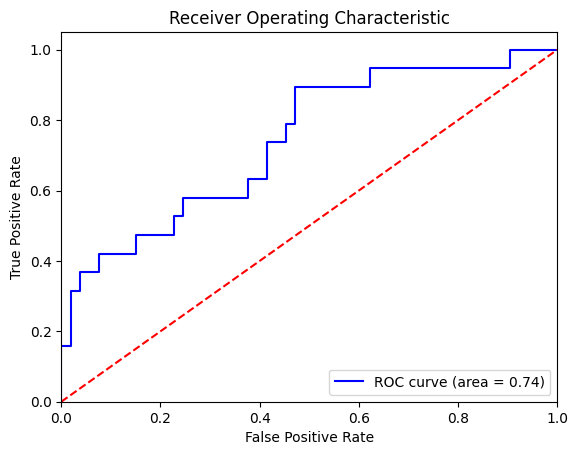

<Figure size 640x480 with 0 Axes>

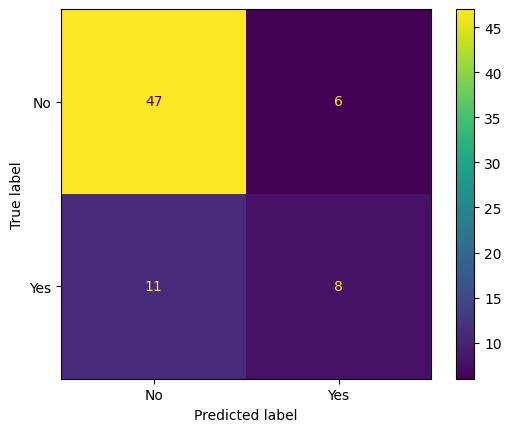

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        53
           1       0.57      0.42      0.48        19

    accuracy                           0.76        72
   macro avg       0.69      0.65      0.67        72
weighted avg       0.75      0.76      0.75        72



In [72]:
model=SVC(C=10, gamma=1, kernel='linear', probability=True)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_proba=model.predict_proba(x_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
plt.figure()
cm = confusion_matrix(np.array(y_test), y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["No","Yes"])
cm_display.plot()
plt.show()
print(classification_report(y_test, y_pred))

We are getting almost same accuracy and minimising computational costs for prediction

# Task 7: Model Deployment (Hands-on)
## Save the Trained Model:
- After selecting and training the best model, save it as a pickle (.pkl) file for future use.
- Deliverable: Save the model using joblib or pickle in a &quot;models&quot; directory.
## Create a Flask API for Model Deployment:
- Build a simple Flask application that accepts input data through an API and returns the model&#39;s prediction.
- Deliverable: Create an API route /predict that takes input features (like the ones in your dataset) and returns a
prediction (whether the customer will churn or not).
- Deploy the Flask App on Free Platforms:
Choose one of the following free deployment platforms for the Flask API:
- - Option 1: Render.com
Render offers a free tier to deploy Flask applications.
Deliverable: Deploy the Flask API on Render and provide the URL for accessing predictions.
- - Option 2: Deta.sh
Deta offers free and simple deployment for small Python projects, including Flask apps.
Deliverable: Deploy the Flask API on Deta and provide a URL.
- - Option 3: PythonAnywhere
PythonAnywhere has a free tier for deploying web apps with limited resources.
Deliverable: Deploy the Flask API on PythonAnywhere and share the access URL.

In [73]:
import os
if not os.path.exists("models"):
    os.makedirs("models")

In [74]:
import pickle

In [75]:
with open('models/svc_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully as 'models/svc_model.pkl'!")

Model saved successfully as 'models/svc_model.pkl'!


In [76]:
dict={}
for i in imp_features:
  if i in unique_values_dict:
    dict[i]=unique_values_dict[i]

dict

{'Contract': ['Month-to-month', 'One year', 'Two year'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'PaperlessBilling': ['Yes', 'No']}

In [77]:
columns=['tenure', 'MonthlyCharges', 'TotalCharges']

In [78]:
with open('models/scaler_t.pkl', 'wb') as file:
    pickle.dump(scaler["tenure"], file)

print("Model saved successfully as 'models/scaler_t.pkl'!")


Model saved successfully as 'models/scaler_t.pkl'!


In [79]:
with open('models/scaler_mc.pkl', 'wb') as file:
    pickle.dump(scaler["MonthlyCharges"], file)

print("Model saved successfully as 'models/scaler_mc.pkl'!")

Model saved successfully as 'models/scaler_mc.pkl'!


In [80]:
with open('models/scaler_tc.pkl', 'wb') as file:
    pickle.dump(scaler["TotalCharges"], file)

print("Model saved successfully as 'models/scaler_tc.pkl'!")

Model saved successfully as 'models/scaler_tc.pkl'!


# Deployed Link
https://mastersoft.onrender.com/

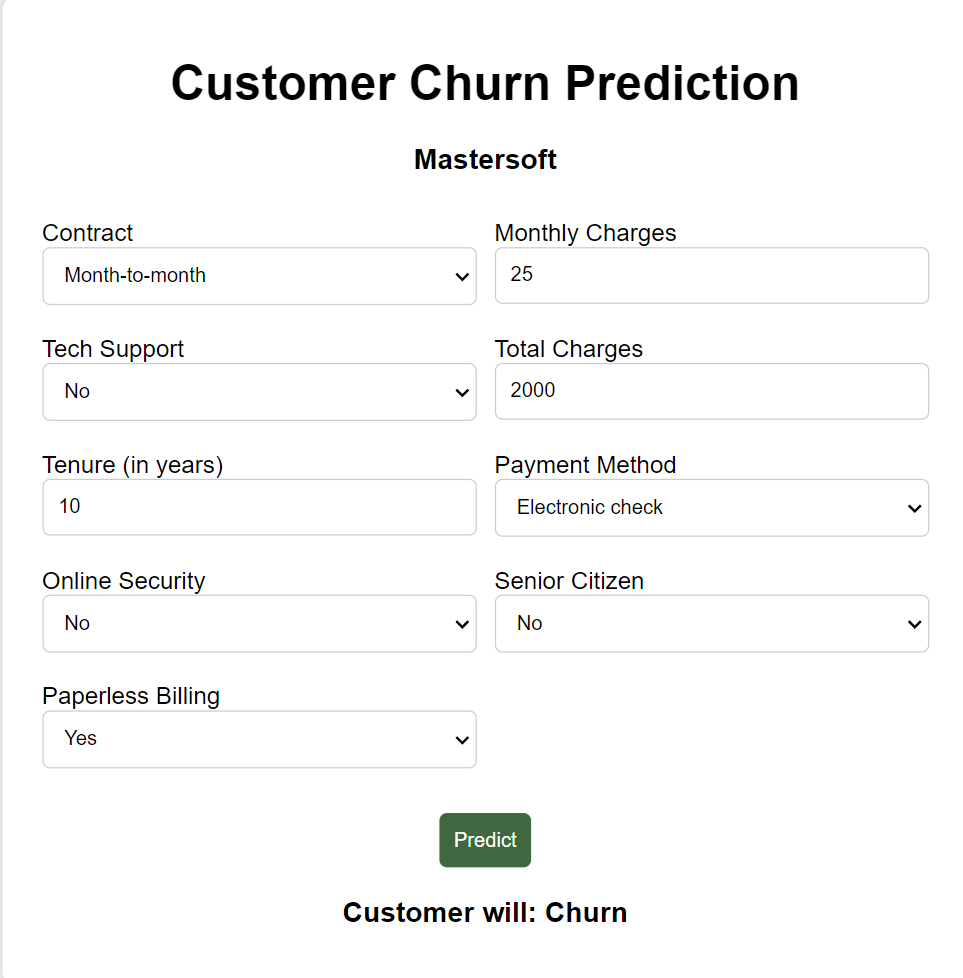